### imports

In [1]:
import torch as tor
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

### make data

In [2]:
nperClust = 100
blur = 1.25
C = [5, 5]
A = [0, 5]
B = [2, 1]
clsA = [
    A[0] + np.random.randn(nperClust) * blur,
    A[1] + np.random.randn(nperClust) * blur,
]
clsB = [
    B[0] + np.random.randn(nperClust) * blur,
    B[1] + np.random.randn(nperClust) * blur,
]
clsC = [
    C[0] + np.random.randn(nperClust) * blur,
    C[1] + np.random.randn(nperClust) * blur,
]
label_np = np.vstack(
    (np.zeros((nperClust, 1)), np.ones((nperClust, 1)), np.full((nperClust, 1), 2))
)
data_np = np.hstack((clsA, clsB, clsC)).T
data = tor.tensor(data_np, dtype=tor.float)
labels = tor.tensor(label_np, dtype=tor.float)

# organize data
label_np = np.hstack((np.zeros(nperClust), np.ones(nperClust), np.full(nperClust, 2)))
data_np = np.hstack((clsA, clsB, clsC)).T
data = tor.tensor(data_np, dtype=tor.float)
labels = tor.tensor(label_np, dtype=tor.long)

### experiment

In [3]:
noOfNodes = 200
epochs = 100
accuracies = []
for i in range(1, noOfNodes):
    # ANN
    ANNiris = nn.Sequential(
        nn.Linear(2, i),  # input layer
        nn.ReLU(),  # activation function
        nn.Linear(i, i),  # hidden layer
        nn.ReLU(),  # activation function
        nn.Linear(i, 3),  # output layer
    )
    lossFun = nn.CrossEntropyLoss()  # loss function includes softmax as well
    optimizer = tor.optim.SGD(ANNiris.parameters(), lr=0.01)  # optimizer

    # training
    for epoch in range(epochs):
        # forward pass
        output = ANNiris(data)

        # compute loss
        loss = lossFun(output, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # final output
    pred = ANNiris(data)
    predLabel = tor.argmax(pred, axis=1)
    accuracy = tor.mean((predLabel == labels).float()) * 100
    accuracies.append(accuracy)
    print("Done with %d nodes in hidden layer and accuracy is %.2f" % (i, accuracy))

Done with 1 nodes in hidden layer and accuracy is 33.33
Done with 2 nodes in hidden layer and accuracy is 39.67
Done with 3 nodes in hidden layer and accuracy is 70.33
Done with 4 nodes in hidden layer and accuracy is 75.33
Done with 5 nodes in hidden layer and accuracy is 80.33
Done with 6 nodes in hidden layer and accuracy is 41.00
Done with 7 nodes in hidden layer and accuracy is 64.33
Done with 8 nodes in hidden layer and accuracy is 51.67
Done with 9 nodes in hidden layer and accuracy is 52.67
Done with 10 nodes in hidden layer and accuracy is 43.67
Done with 11 nodes in hidden layer and accuracy is 63.67
Done with 12 nodes in hidden layer and accuracy is 62.33
Done with 13 nodes in hidden layer and accuracy is 67.67
Done with 14 nodes in hidden layer and accuracy is 67.33
Done with 15 nodes in hidden layer and accuracy is 76.33
Done with 16 nodes in hidden layer and accuracy is 63.33
Done with 17 nodes in hidden layer and accuracy is 69.67
Done with 18 nodes in hidden layer and a

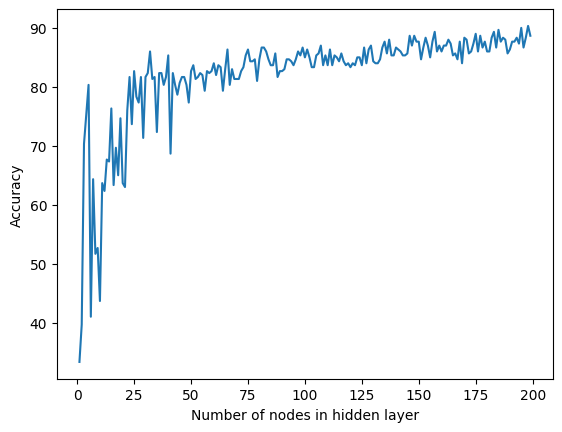

In [5]:
plt.plot(range(1, noOfNodes), accuracies)
plt.xlabel("Number of nodes in hidden layer")
plt.ylabel("Accuracy")
plt.show()